In [58]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as dates

plt.style.use('dark_background')

df = pd.read_csv("./corona_ts.csv", parse_dates=True)

df = df.rename(columns={
    "Country/Region" : "country",
    "Province/State" : "state"})

print(df.columns.tolist()[:10])
df.head(5)


# get y-axis into readable units eg x / 100K infect >>> # normalize country-numbers by total countries population ??? > index
# plot dates eg only months
# overall numbers histogram > cross-check against other sources
# check how to "time the dashboard" to newly released data every day
# summarize basic stats eg, time-line, num countries etc.

['state', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20']


,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779


In [99]:
ts_min = 4  # measurements begin
t = df.columns.tolist()[ts_min:]
ts_total = len(t)
print("number of days recorded:", ts_total)

number of days recorded: 729


In [61]:
print("countries with additional state information:", df.country[df.state.notna()].nunique(), "\n", df.country[df.state.notna()].unique())
print("total number of countries:", df.country.nunique())

countries with additional state information: 8 
 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']
total number of countries: 196


# Overall corona numbers

In [93]:
dfg = df.groupby(by="country").sum()
dfg_ = dfg.reset_index()

# State pooled, time-integrated numbers
dfg_["cases"] = dfg_.loc[:, t].sum(axis=1)

# All cases summed across countries
cases_t = dfg_.loc[:, t].sum(axis=0)

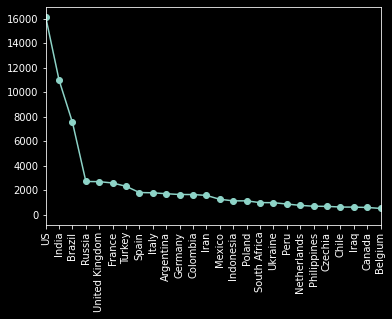

In [98]:
country_sorted = dfg_.sort_values(by="cases", ascending=False)["country"]
cases_sorted = dfg_.sort_values(by="cases", ascending=False)["cases"]

show = 25
plt.figure()
plt.plot(country_sorted, cases_sorted / 1000000, "o-")
plt.xlim([0, show])
plt.xticks(rotation=90);

## Time series of corona cases in germany

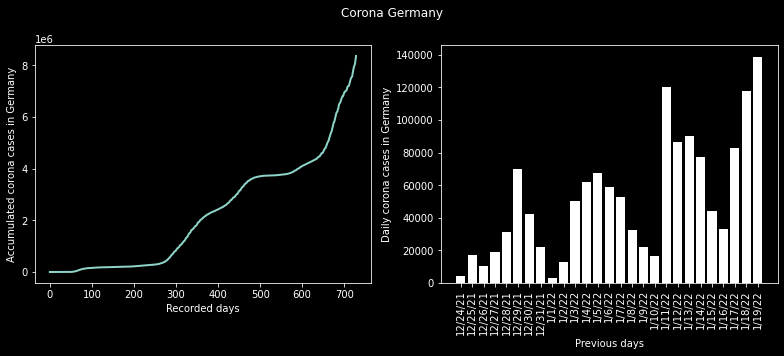

In [103]:
# country idx
dfg = dfg.reset_index()
idx = dfg[dfg.country == "Germany"].index.tolist()
y = np.squeeze(dfg.loc[idx, t].values)

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.suptitle("Corona Germany")

plt.plot(y, lw=2)
plt.xlabel("Recorded days")
plt.ylabel("Accumulated corona cases in Germany")

prev = 28 # previous days to show
y2 = y / 10
y2 = y[-prev:]
x2 = t[-prev+1:]  # have same n_elem as y

plt.subplot(122)
plt.bar(x2, np.diff(y2), color="w")
plt.xlabel("Previous days")
plt.ylabel("Daily corona cases in Germany")
plt.xticks(rotation=90);
plt.tight_layout()

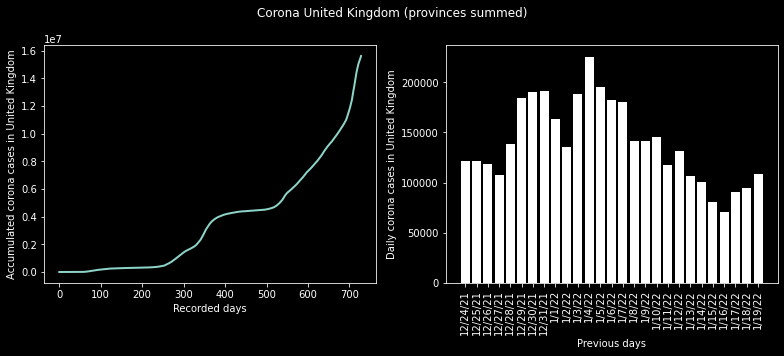

In [109]:
# country idx
#dfg = df.groupby(by="country").sum()
#dfg = dfg.reset_index()
cname = "United Kingdom"
idx = dfg[dfg.country == cname].index.tolist()
y = np.squeeze(dfg.loc[idx, t].values)


plt.figure(figsize=(11,5))
plt.subplot(121)
plt.suptitle(f"Corona {cname} (provinces summed)")

plt.plot(y, lw=2)
plt.xlabel("Recorded days")
plt.ylabel(f"Accumulated corona cases in {cname}")

prev = 28 # previous days to show
y2 = y / 10
y2 = y[-prev:]
x2 = t[-prev+1:]  # have same n_elem as y

plt.subplot(122)
plt.bar(x2, np.diff(y2), color="w")

plt.xlabel("Previous days")
plt.ylabel(f"Daily corona cases in {cname}")
plt.xticks(rotation=90);
plt.tight_layout()

# Times series of several countries in comparison
the problem here is the fucking legend! the data doesnt match to the line color > investigate or change and plot multiple via color
## Ok solved that > clean up

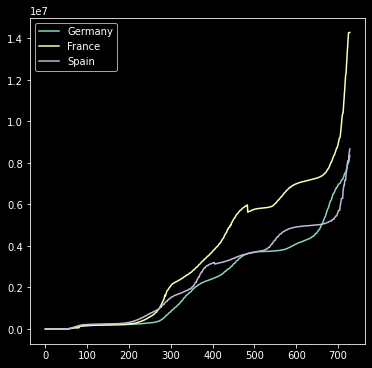

In [132]:

clist = ["Germany", "France", "Spain"]
tss = list()
for c in clist:
    idx = dfg[(dfg["country"] == c)].index.tolist()
    tss.append(np.squeeze(dfg.loc[idx, t].values))

tss = np.array(tss).T

plt.figure(figsize=(6, 6))
plt.plot(tss, '-') #plt.plot(ys[:, n], '-', label=ccountry)
plt.legend(clist)

# this down here works
# col_ = ["w", "r", "b", "m", "grey"] 
# plt.figure(figsize=(6, 6))
# for n, ccountry in enumerate(clist):
#     plt.plot(tss[:, n], '-', color=col_[n], label=ccountry) #plt.plot(ys[:, n], '-', label=ccountry)
#     print(ccountry)
# plt.legend()

[62, 66] 62     France
66    Germany
Name: country, dtype: object
Germany
France


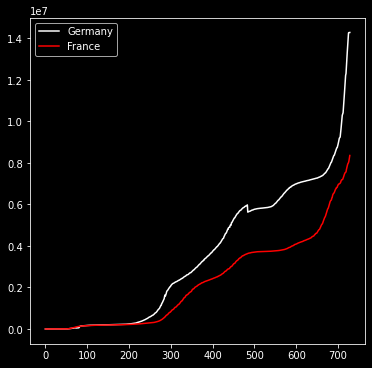

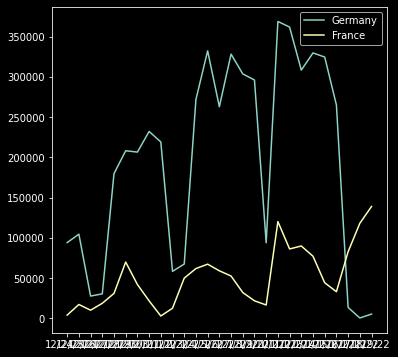

In [112]:
# Group by country / ignore states for now
dfg = df.groupby(by="country").sum()
dfg = dfg.reset_index()

# Or shortlist
clist = ["Germany", "France"] # "India", "US" # "China", "Indonesia", chinas provices might be interesting
nth = [nth for nth, c in enumerate(dfg["country"].tolist()) if c in clist]
print(nth, dfg.loc[nth, "country"])

# for c in clist:
#     idx = dfg[dfg.country == c].index.tolist()
#     print(idx)
#y = np.squeeze(dfg.loc[idx, t].values)

# Get data
ys = dfg.loc[nth, t].T.values

col_ = ["w", "r", "b", "m", "grey"] 
plt.figure(figsize=(6, 6))
for n, ccountry in enumerate(clist):
    plt.plot(ys[:, n], '-', color=col_[n], label=ccountry) #plt.plot(ys[:, n], '-', label=ccountry)
    print(ccountry)
plt.legend()

# prev = 28 # previous days to show
# ys2 = ys / 10
# ys2 = ys[-prev:]
# x2 = t[-prev+1:]  # have same n_elem as y

# plt.figure(figsize=(6, 6))
# for n, ccountry in enumerate(clist):
#     plt.plot(x2, np.diff(ys2[:, n], axis=0), '-', label=ccountry)
# plt.legend()


In [ ]:
# time from till, xvec, num_xvec
country_sum = df.iloc[:, 4:].sum(axis=1)

plt.figure()
plt.plot(country_sum)

In [ ]:
df.loc[country_sum > 1e10, "country"]

In [ ]:
df_.loc[country_sum > 1e10]

In [ ]:
country_sum = df_.iloc[:, 4:].sum(axis=1)
#print(df_.loc[country_sum > 1e10])

plt.figure()
plt.plot(country_sum)

In [ ]:
clist in df_.index

In [ ]:
df_ = df.groupby(by="country").mean()
df_ = df_.reset_index()
df_

In [ ]:
# Group by country / ignore states for now
df.country[df.state.notna()]

# this is now another df w/o state info
df_ = df.groupby(by="country").mean()
df_ = df_.reset_index()

# Or shortlist
clist = ["Germany", "India", "US", "Spain", "Italy"]  # "China", "Indonesia", chinas provices might be interesting
nth = [nth for nth, c in enumerate(df_["country"].tolist()) if c in clist]
print(nth, df_.loc[nth, "country"])

# Get data
ys = df_.iloc[nth, 4:].T
#ys = df_.iloc[clist in df_["country"], 4:].T
print(ys.shape)

plt.figure(figsize=(6, 6))
plt.plot(ys, '--')
plt.legend(clist)


In [ ]:
df_[df_.country == "Germany"]

In [ ]:
ts_min = 4
x_t = df.columns.tolist()[ts_min:]
ts_total = len(x_t)

# country idx
idx = df[df.country == "Germany"].index.tolist()
y = df.loc[idx, x_t]

plt.figure()
plt.plot(x_t, y)

In [ ]:
x = np.array([x_.split("/")[::-1] for x_ in x_t]).astype("int")
x = np.array([x_.split("/") for x_ in x_t]).astype("int")
#x[:,0] = x[:, 0]+2000
x

In [ ]:
x[0]

In [ ]:
dt = datetime.date(x[0, 2], x[0, 0], x[0, 1])
dt
dt.strftime("%b")

In [ ]:
idx = [0,1]
y = df.loc[idx, x_t].T.values
y


In [ ]:
plt.figure()
plt.plot(y)